In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from kaleido.scopes.plotly import PlotlyScope
import datetime


In [41]:
# importar datos limpiados
df = pd.read_csv('csv/AirBNB_2009-2020.csv')

In [42]:
# set columna 'id' como index
df.set_index('id', inplace = True)
df = df.rename(columns={"neighbourhood_cleansed": "Barrio","host_total_listings_count": "listings_host","neighbourhood_group_cleansed": "Distrito"})

In [43]:
# fill NaNs in columna 'license'
df['license'].fillna('no', inplace = True)

#comprobar si hay NaNs
df.isna().sum()

# convertir en formato daytime columna 'first-review'
df['first_review']= pd.to_datetime(df['first_review'])

# añadir columna para el conteo de crecimiento de numero de apartamentos
df = df.sort_values('first_review')

# mover columna 'Date' al principio
date = df.pop('first_review')
df.insert(0, 'date', date)
df.groupby('Distrito').size()

Distrito
Arganzuela               1040
Barajas                   177
Carabanchel               673
Centro                   9479
Chamartín                 554
Chamberí                 1243
Ciudad Lineal             688
Fuencarral - El Pardo     318
Hortaleza                 377
Latina                    642
Moncloa - Aravaca         542
Moratalaz                 124
Puente de Vallecas        539
Retiro                    501
Salamanca                1341
San Blas - Canillejas     527
Tetuán                    805
Usera                     317
Vicálvaro                  65
Villa de Vallecas          95
Villaverde                179
dtype: int64

In [44]:
# Licencias incluyendo alojamientos sin reseña
df_lic = df[['license', 'date']]
df_lic['date']= pd.to_datetime(df_lic['date'])
df_lic.set_index('date', inplace = True)
df_lic = df_lic.resample('YS').nunique()
df_lic = df_lic.reset_index()
df_lic = df_lic.rename(columns={0:'licencias'})
df_lic.set_index('date', inplace = True)
df_lic['total'] = df_lic['license'].cumsum()
df_lic

license  total
date                      
2010-01-01        1      1
2011-01-01       10     11
2012-01-01       36     47
2013-01-01       80    127
2014-01-01      111    238
2015-01-01      168    406
2016-01-01      313    719
2017-01-01      558   1277
2018-01-01      787   2064
2019-01-01      704   2768
2020-01-01      165   2933

In [84]:
# Crecimiento con Host since
df_host = df[['Distrito', 'room_type', 'date', 'host_since']]
df_host['date']= pd.to_datetime(df_host['host_since'])
df_host['aptos_year'] = 1
df_host.set_index('date', inplace = True)
df_host = df_host.resample('YS').sum()
df_host['total'] = df_host['aptos_year'].cumsum()
df_host

aptos_year  total
date                         
2009-01-01          12     12
2010-01-01          52     64
2011-01-01         362    426
2012-01-01         969   1395
2013-01-01        1198   2593
2014-01-01        1578   4171
2015-01-01        2352   6523
2016-01-01        2620   9143
2017-01-01        1801  10944
2018-01-01        1804  12748
2019-01-01        1755  14503
2020-01-01         468  14971

In [46]:
'''
mask = df['Distrito'] == 'Centro'
df_host_centro = df[['Distrito', 'room_type', 'date', 'host_since']]
df_host_centro = df_host_centro[mask]
df_host_centro['date']= pd.to_datetime(df_host_centro['host_since'])
df_host_centro['aptos_year'] = 1
df_host_centro.set_index('date', inplace = True)
df_host_centro = df_host_centro.resample('MS').sum()
df_host_centro['total'] = df_host_centro['aptos_year'].cumsum()
df_host_centro
'''

"\nmask = df['Distrito'] == 'Centro'\ndf_host_centro = df[['Distrito', 'room_type', 'date', 'host_since']]\ndf_host_centro = df_host_centro[mask]\ndf_host_centro['date']= pd.to_datetime(df_host_centro['host_since'])\ndf_host_centro['aptos_year'] = 1\ndf_host_centro.set_index('date', inplace = True)\ndf_host_centro = df_host_centro.resample('MS').sum()\ndf_host_centro['total'] = df_host_centro['aptos_year'].cumsum()\ndf_host_centro\n"

In [47]:
# eliminar filas con NaNs (5.200 sin reseñas)
df = df.dropna()

df['total'] = 1
df['acum'] = df['total'].cumsum()

In [82]:
# Crear df con todas las entradas (al otro se quitan aptos sin reseña)
df_years = df[['Distrito', 'room_type', 'date', 'host_since']]
df_years['aptos_year'] = 1
df_years['date']= pd.to_datetime(df_years['date'])
df_years.set_index('date', inplace = True)
df_years = df_years.resample('YS').sum()
df_years['total'] = df_years['aptos_year'].cumsum()
df_years

aptos_year  total
date                         
2010-01-01           4      4
2011-01-01          38     42
2012-01-01         141    183
2013-01-01         271    454
2014-01-01         465    919
2015-01-01         947   1866
2016-01-01        1545   3411
2017-01-01        2476   5887
2018-01-01        2992   8879
2019-01-01        4446  13325
2020-01-01        1646  14971

In [49]:
# Crear columna para traducir dias a meses como en el Dataframe distritos (luego se hace de una manera más elegante)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df["newdate"] = df["month"].astype(str) + '/01/' + df["year"].astype(str)
df['newdate']= pd.to_datetime(df['newdate'])
df

date  host_since  listings_host          Barrio    Distrito  \
id                                                                           
6369     2010-03-14  2009-04-16            1.0  Hispanoamérica   Chamartín   
26825    2010-05-10  2010-04-27            1.0         Legazpi  Arganzuela   
30320    2010-07-06  2010-05-24            3.0             Sol      Centro   
40916    2010-11-01  2010-05-24            3.0     Universidad      Centro   
72150    2011-02-13  2011-01-27            4.0     Embajadores      Centro   
...             ...         ...            ...             ...         ...   
43201596 2020-09-13  2020-04-14            0.0       Recoletos   Salamanca   
44466015 2020-09-13  2020-07-29            1.0    Vallehermoso    Chamberí   
45075462 2020-09-13  2019-08-20            0.0      Rios Rosas    Chamberí   
34747265 2020-09-13  2016-02-22            2.0     Prosperidad   Chamartín   
45234416 2020-09-14  2018-09-19            6.0     Castillejos      Tetuán   

          latitude  longitude        room_type    price  availability_365  \
id                                                                          
6369      40.45724   -3.67688     Private room   $45.00               107   
26825     40.38985   -3.69011     Private room   $26.00               365   
30320     40.41552   -3.70346  Entire home/apt   $65.00               365   
40916     40.42096   -3.70428  Entire home/apt   $90.00               365   
72150     40.41150   -3.70449  Entire home/apt   $79.00               169   
...            ...        ...              ...      ...               ...   
43201596  40.42467   -3.68456  Entire home/apt  $543.00               103   
44466015  40.44622   -3.70447  Entire home/apt   $65.00               365   
45075462  40.44165   -3.69957     Private room   $17.00                12   
34747265  40.44409   -3.67054     Private room   $15.00                 0   
45234416  40.45756   -3.70011  Entire home/apt   $40.00               318   

         last_review  license  total   acum  year  month    newdate  
id                                                                   
6369      2020-07-06       no      1      1  2010      3 2010-03-01  
26825     2020-03-12       no      1      2  2010      5 2010-05-01  
30320     2020-01-04       no      1      3  2010      7 2010-07-01  
40916     2020-01-05       no      1      4  2010     11 2010-11-01  
72150     2020-07-31  VT-6993      1      5  2011      2 2011-02-01  
...              ...      ...    ...    ...   ...    ...        ...  
43201596  2020-09-13       no      1  14967  2020      9 2020-09-01  
44466015  2020-09-13   VT3345      1  14968  2020      9 2020-09-01  
45075462  2020-09-13       no      1  14969  2020      9 2020-09-01  
34747265  2020-09-13       no      1  14970  2020      9 2020-09-01  
45234416  2020-09-14       no      1  14971  2020      9 2020-09-01  

[14971 rows x 17 columns]

In [50]:
# Crear Dataframe con 10 años de datos de 3 distritos + Madrid
df_dis = pd.read_csv(r'csv/Datos_distritos.csv')

In [51]:
# Set Fecha como index
df_dis['Date']= pd.to_datetime(df_dis['Mes'])
df_dis['Date'] = pd.DatetimeIndex(df_dis['Date'])
df_dis.set_index('Date', inplace = True)
df_dis.drop('Mes', axis = 1, inplace = True)

In [52]:
#Crear series de datos distritos para cruzarlos del AirBNB a distritos
mask = df['Distrito'] == 'Centro'
df_C = df[mask]
df_C = df_C.groupby('newdate').size()

mask = df['Distrito'] == 'Ciudad Lineal'
df_CL = df[mask]
df_CL = df_CL.groupby('newdate').size()

mask = df['Distrito'] == 'Villa de Vallecas'
df_V = df[mask]
df_V = df_V.groupby('newdate').size()

df_C.name = 'AirBNB_Centro'
df_CL.name = 'AirBNB_CiudadL'
df_V.name = 'AirBNB_Vallecas'

# Añadir info AirBNB a distritos
df_dis = df_dis.join(df_C)
df_dis = df_dis.join(df_CL)
df_dis = df_dis.join(df_V)

In [53]:
df_dis['AirBNB_Centro'] = df_dis['AirBNB_Centro'].fillna(0)
df_dis['AirBNB_CiudadL'] = df_dis['AirBNB_CiudadL'].fillna(0)
df_dis['AirBNB_Vallecas'] = df_dis['AirBNB_Vallecas'].fillna(0)

In [54]:
df_dis['CAM PIB M'] = df_dis['CAM PIB M'].astype(int)
df_dis['CAM Var PIB'] = df_dis['CAM Var PIB'].round(3)
df_dis.to_csv(r'csv/Distritos.csv')

In [55]:
# Elegir solo room type 'entire' para conteo de ratio AirBNB/viviendas
df_total = pd.read_csv('csv/listings_202008.csv')
df_total = df_total.rename(columns={"neighbourhood_cleansed": "Barrio","host_total_listings_count": "listings_host","neighbourhood_group_cleansed": "Distrito"})
mask = df_total['room_type'] == 'Entire home/apt'
ratio = df_total[mask].groupby(['Distrito']).size()

In [56]:
# Definición de colores
color_discrete_sequence=["#1F6768", "#7DC2BF","#EE2737", "#FBD872" ]
color_discrete_sequence2=["#1F6768", "#7DC2BF","#EE2737", "#FBD872","#aeaeae", '#c3dbdb']
color_continuous_scale=["#EDEBDC", "#FBD872", "#EE2737"]
color_continuous_scale2=["#EE2737",'#ECEDF4', "#FBD872"]

In [85]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_years.index, y=df_years.total,
                    mode='lines',
                    name='Apartamentos activos',
                         marker_color='#EE2737'))

fig.add_trace(go.Scatter(x=df_host.index, y=df_host.total,
                    mode='lines',
                    name='Apartamentos/host',
                        marker_color='#1F6768'))

fig.add_trace(go.Scatter(x=df_lic.index, y=df_lic.total,
                    mode='lines',
                    name='Licencias',
                        marker_color='#FBD872'))

fig.add_trace(go.Bar(x=df_host.index, y=df_host.aptos_year, name='Apartamentos/año', marker_color='#EE2737 '))
fig.add_trace(go.Bar(x=df_years.index, y=df_years.aptos_year, name='Apartamentos/año/host', marker_color='#1F6768'))
fig.update_yaxes(showgrid=True, tickformat = '.')
fig.update_xaxes(dtick = 'M12')
fig.update_layout(template="seaborn",
                  width=900,
                  height=500, 
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="left",
                      x=0.01))
fig.show()

In [58]:
df_aptos_host = pd.read_csv('csv/listings_202008.csv')
df_aptos_host['count'] = 1
data = [df_aptos_host['host_id'],df_aptos_host['count']]
df_aptos_host = pd.concat(data, axis=1)
df_aptos_host = df_aptos_host.groupby(['host_id']).sum()
df_aptos_host = df_aptos_host.reset_index()
df_aptos_host = df_aptos_host.groupby(['count']).size()
df_aptos_host = df_aptos_host.reset_index()
df_aptos_host.rename(columns={0: "hosts"}, inplace = True)
df_aptos_host['bins'] = df_aptos_host['count']
df_aptos_host['bins'] = df_aptos_host['bins'].where(df_aptos_host['count'] <= 5, '>5')
df_aptos_host=df_aptos_host['hosts'].groupby(df_aptos_host['bins']).sum()
df_aptos_host = df_aptos_host.reset_index()
df_aptos_host.rename(columns={0: "hosts"}, inplace = True)

In [59]:
violin = pd.read_csv('csv/listings_202008.csv')
violin['count'] = 1
data = [violin['host_id'],violin['count']]
violin = pd.concat(data, axis=1)
violin = violin.groupby(['host_id']).sum()
violin = violin.reset_index()
violin

host_id  count
0           7952      1
1          13660      1
2          17453      1
3          31622      2
4          50106      1
...          ...    ...
11638  365784623      1
11639  365945412      1
11640  366385883      1
11641  366922215      1
11642  367096337      1

[11643 rows x 2 columns]

In [60]:
df_donut = pd.read_csv('csv/listings_202008.csv')
df_donut = df_donut[['host_id','host_name','calculated_host_listings_count']]
df_donut.sort_values(by = 'calculated_host_listings_count', ascending = False)

host_id host_name  calculated_host_listings_count
16720  102947901   Claudia                             213
5347   102947901   Claudia                             213
5353   102947901   Claudia                             213
8552   102947901   Claudia                             213
5352   102947901   Claudia                             213
...          ...       ...                             ...
9379   192683832   Sabrina                               1
9380      460240    Stefan                               1
9381   206887100     Wenli                               1
9395   206837080   Patrick                               1
20225  360742569   Abraham                               1

[20226 rows x 3 columns]

In [61]:
fig = px.pie(df_aptos_host, 
             values='hosts', 
             names='bins', 
             hole=.3, 
             color_discrete_sequence=color_discrete_sequence2, 
             width=800, 
             height=400)
fig.update_layout(template="simple_white",
                  legend=dict(y=0.01,
                              x=0.01))
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="center",
    x=0.5))
fig.show()
fig.write_image(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\Aptos_perHost.png")

#join df_original con df_aptos_host

In [62]:
fig = px.violin(violin, y="count", box=True, # draw box plot inside the violin
                points='all',
                color_discrete_sequence=color_discrete_sequence,
                template="simple_white"
               )
fig.show()

In [63]:
tipos = df['room_type'].value_counts()
tipos = tipos.reset_index()
tipos.rename(columns={'index': "tipos", 'room_type': "numero"}, inplace = True)

In [64]:

fig = go.Figure([go.Bar(x=tipos['tipos'], y=tipos['numero'], marker_color=color_discrete_sequence)])
fig.update_layout(template="simple_white",
                  width=700,
                  height=500)
fig.update_yaxes(tickformat=".")
fig.update_traces(texttemplate=['9.452','5.174', '208','137'], textposition='outside')
fig.show()

In [65]:
mapbox_access_token = "pk.eyJ1Ijoia2Vyc3RpbmsiLCJhIjoiY2tnbGJ1enN6MGZ0ZTJ0cGNrbzJid3g4NSJ9.cN4FFIyy2xOcdjGHEUwzFQ"

fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color = "room_type",
                        animation_frame="year",
                        opacity = 0.8,
                        color_discrete_map={
                "Private room": "#7DC2BF",
                "Entire home/apt": "#EE2737"},
                        #color_discrete_sequence=color_discrete_sequence2,
                        zoom=11)
fig.update_layout(mapbox=dict(accesstoken=mapbox_access_token), mapbox_style = 'dark')
fig.show();
fig.write_html(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\DensidadAirBNB2.html")

In [66]:
mapbox_access_token = "pk.eyJ1Ijoia2Vyc3RpbmsiLCJhIjoiY2tnbGJ1enN6MGZ0ZTJ0cGNrbzJid3g4NSJ9.cN4FFIyy2xOcdjGHEUwzFQ"

fig = ff.create_hexbin_mapbox(df,
                              lat="latitude",
                              lon="longitude",
                              #color = "total",
                              labels={"color": "Nº Apartamentos"},
                              #color_continuous_scale="inferno",
                              color_continuous_scale=color_continuous_scale,
                              nx_hexagon=100,
                              #animation_frame="Year",
                              #agg_func=np.cumsum,
                              #range_color=[50,250],
                              opacity = 0.7,
                              min_count=1,
                              zoom=13,
                              center=dict(lat=40.417,lon=-3.7),)
fig.update_layout(
    mapbox=dict(accesstoken=mapbox_access_token))
fig.show() 
fig.write_html(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\Map_hexbin.html")

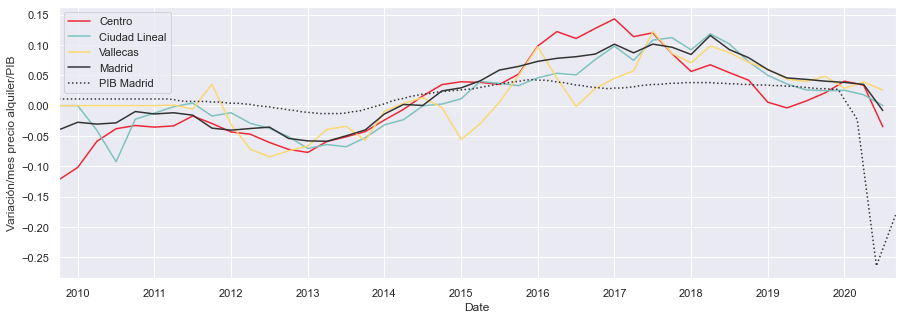

In [67]:
#"#789DB7", "#FFB838","#486D87", "#aeaeae"
fig =plt.figure(figsize=(15, 5))
ax1 = df_dis["C Var"].resample('QS').mean().plot(color = '#EE2737')
ax2 = df_dis["CL Var"].resample('QS').mean().plot(color = '#7DC2BF')
ax3 = df_dis["V Var %"].resample('QS').mean().plot(color = '#FBD872')
ax4 = df_dis["M Var"].resample('QS').mean().plot(color = '#333333',style = ':')
ax5 = df_dis["CAM Var PIB"].plot(color = '#333333',style = ':')
plt.ylabel('Variación/mes precio alquiler/PIB', color='#333333')
plt.legend(['Centro','Ciudad Lineal','Vallecas','Madrid','PIB Madrid'], loc = 'upper left');
plt.savefig(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\var_precios.png")

In [108]:
df_dis['C Padron'] = round(df_dis['C Padron']/3,0)

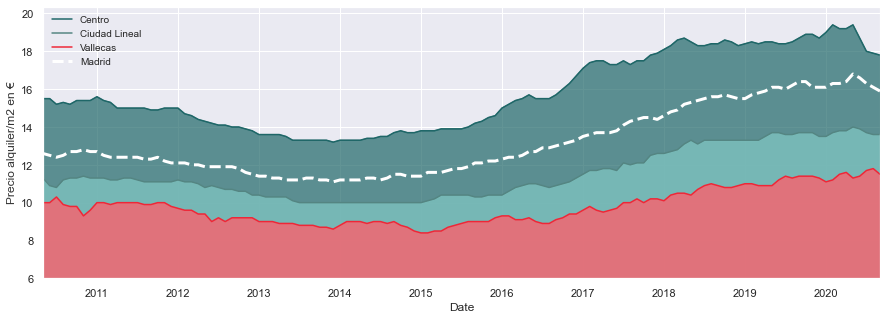

In [69]:
fig =plt.figure(figsize=(15,5))
ax1 = df_dis["C Precio m2"].plot(color = '#1F6768').fill_between(df_dis.index,0,df_dis["C Precio m2"], color='#1F6768', alpha = 0.7)
ax2 = df_dis["CL Precio"].plot(color = '#548582').fill_between(df_dis.index,0,df_dis["CL Precio"], color='#7DC2BF', alpha = 0.8)
ax3 = df_dis["V Precio m2"].plot(color = '#EE2737').fill_between(df_dis.index,0,df_dis["V Precio m2"], color='#ed6b75', alpha = 0.9)
ax4 = df_dis["M Precio m2"].plot(color = 'white',linewidth=3, style = '--')
plt.ylabel('Precio alquiler/m2 en €', color='#333333')
#plt.grid(axis = 'x')
plt.ylim(bottom=6)
plt.xlim([datetime.date(2010,5,1), datetime.date(2020,9,1)])
plt.style.use('seaborn')
plt.legend(['Centro','Ciudad Lineal','Vallecas','Madrid'], loc = 'upper left');
plt.savefig(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\precio_alqiileres.png")
#fig.write_image(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\precio_alqiileres.png")

In [109]:
df_dis

V Precio m2  V Var %  V Padron  C Precio m2  C Var  C Padron  \
Date                                                                       
2020-09-01         11.5    0.011      1500         17.8 -0.048    -100.0   
2020-08-01         11.8    0.045      1537         17.9 -0.032    -105.0   
2020-07-01         11.7    0.021      1574         18.0 -0.024    -111.0   
2020-06-01         11.4    0.016      1611         18.7  0.012    -116.0   
2020-05-01         11.3    0.039      1648         19.4  0.050    -122.0   
...                 ...      ...       ...          ...    ...       ...   
2010-02-01          0.0    0.000      3176         16.0 -0.125    -194.0   
2010-01-01          0.0    0.000      3176         16.3 -0.078    -194.0   
2009-12-01          0.0    0.000      3176         15.9 -0.156    -194.0   
2009-11-01          0.0    0.000      3176         16.0 -0.097    -194.0   
2009-10-01          0.0    0.000      3176         16.0 -0.114    -194.0   

            CL Precio  CL Var  CL Padron  M Precio m2  M Var  CAM Var PIB  \
Date                                                                        
2020-09-01       13.6  -0.010       -900         15.9 -0.030       -0.180   
2020-08-01       13.6   0.000       -948         16.1 -0.009       -0.208   
2020-07-01       13.7   0.011       -997         16.3  0.015       -0.236   
2020-06-01       13.9   0.014      -1046         16.6  0.030       -0.264   
2020-05-01       14.0   0.023      -1095         16.8  0.043       -0.184   
...               ...     ...        ...          ...    ...          ...   
2010-02-01       11.4   0.000      -1743         12.7 -0.026        0.011   
2010-01-01       11.3   0.000      -1743         12.8 -0.035        0.011   
2009-12-01       11.2   0.000      -1743         12.9 -0.023        0.011   
2009-11-01       11.7   0.000      -1743         12.9 -0.040        0.011   
2009-10-01       11.9   0.000      -1743         12.8 -0.057        0.011   

            CAM PIB M  AirBNB_Centro  AirBNB_CiudadL  AirBNB_Vallecas  
Date                                                                   
2020-09-01      15000           31.0             4.0              0.0  
2020-08-01      14947           81.0             6.0              1.0  
2020-07-01      14895          120.0             6.0              0.0  
2020-06-01      14843           43.0             1.0              0.0  
2020-05-01      16386           12.0             2.0              2.0  
...               ...            ...             ...              ...  
2010-02-01      15124            0.0             0.0              0.0  
2010-01-01      15124            0.0             0.0              0.0  
2009-12-01      15124            0.0             0.0              0.0  
2009-11-01      15124            0.0             0.0              0.0  
2009-10-01      15124            0.0             0.0              0.0  

[132 rows x 16 columns]

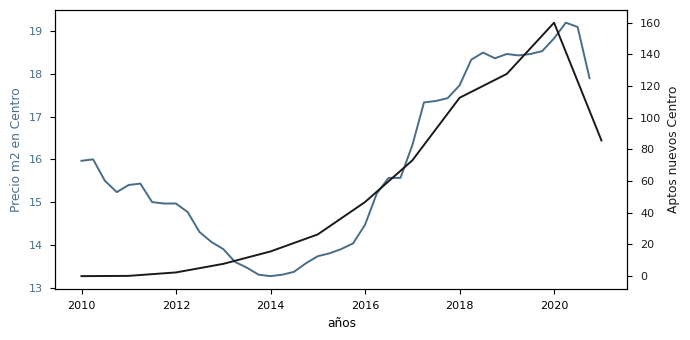

<Figure size 640x440 with 0 Axes>

In [126]:

fig, ax1 = plt.subplots(figsize=(7, 3.5))
x = df_dis.index
C = df_dis["C Precio m2"].resample('Q').mean()
D = df_dis['AirBNB_Centro'].resample('Y').mean()
E = df_dis['C Padron']

color = '#486D87'
ax1.set_xlabel('años')
ax1.set_ylabel('Precio m2 en Centro', color=color)
ax1.plot(C, color=color)
#.fill_between(df_dis.index,0,df_dis["C Precio m2"], color='#789DB7')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'k'
ax2.set_ylabel('Aptos nuevos Centro', color=color)  # we already handled the x-label with ax1
ax2.plot(D, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

plt.style.use('seaborn-paper')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show();
plt.savefig(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\precio_vs_AirBNB.png");

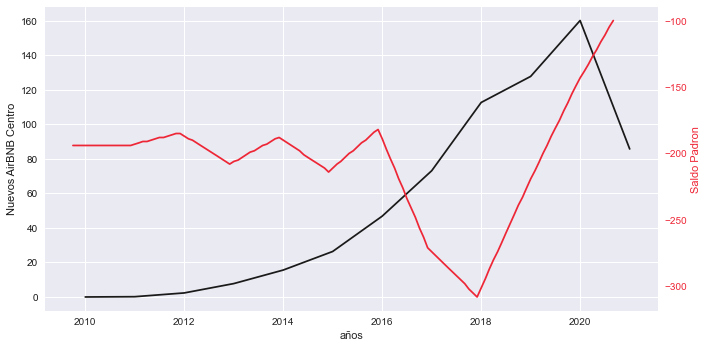

<Figure size 576x396 with 0 Axes>

In [117]:
fig, ax1 = plt.subplots(figsize=(10, 5))
x = df_dis.index
C = df_dis["C Precio m2"].resample('Q').mean()
D = df_dis['AirBNB_Centro'].resample('Y').mean()
E = df_dis['C Padron']

color = 'k'
ax1.set_xlabel('años')
ax1.set_ylabel('Nuevos AirBNB Centro', color=color)
ax1.plot(D, color=color)
#.fill_between(df_dis.index,0,df_dis["C Precio m2"], color='#789DB7')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#EE2737'
ax2.set_ylabel('Saldo Padron', color=color)  # we already handled the x-label with ax1
ax2.plot(E, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

plt.style.use('seaborn')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show();
plt.savefig(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\precio_vs_AirBNB.png");

In [ ]:
viviendas = pd.read_csv('csv/Viviendas.csv', encoding = 'Latin', sep = ';', decimal=",")
viviendas['Variación anual'] = viviendas['Variación anual']*100
viviendas

In [ ]:
# Importar datos de número de viviendas

#viviendas.drop('Unnamed: 2', axis = 1, inplace = True)
viviendas.rename(columns={"Unnamed: 0": "Distritos"}, inplace = True)
viviendas.set_index('Distritos', inplace = True)

# Join numero viviendas y datos AirBNB
viviendas.name = 'viviendas'
ratio.name = 'AirBNB'
df_ratio = viviendas.join(ratio)
df_ratio['ratioAirBNB'] = df_ratio['AirBNB']/df_ratio['Viviendas']
df_ratio['Distritos'] = df_ratio.index

In [ ]:
sns.displot(df_ratio['ratioAirBNB'], kde=True, height=6, aspect=6/6)
plt.xlabel('Ratio aptos turísticos/vivienda')
plt.ylabel('Número barrios');
plt.savefig(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\displot.png")

In [ ]:
df_ratio= df_ratio.sort_values(by = 'ratioAirBNB', ascending = False)
df_ratio.describe()

In [ ]:
fig =plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_ratio.index, y="ratioAirBNB", data=df_ratio,
                 palette="Blues_r")
plt.ylabel('Ratio aptos turísticos/vivienda');
plt.xticks(rotation=90);
plt.savefig(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\ratio.png")

In [ ]:
df_centro = df_dis[['C Precio m2', 'C Padron','C Var','CAM Var PIB','CAM PIB M', 'AirBNB_Centro']]
df_corr = df_centro.corr()

In [ ]:
plt.figure(figsize=(9,7.5))
sns.heatmap(df_corr, vmin=-1, vmax=1, 
            annot=True,
           cmap = sns.diverging_palette(12, 220, as_cmap=True))

plt.show();
plt.savefig(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\HEATMAP.png")

In [ ]:
from urllib.request import urlopen
import json
import geojson
import pandas as pd
import plotly.express as px
with open('DISTRITOS.geojson') as f:
    madrid = geojson.load(f)

fig = px.choropleth_mapbox(df_ratio, 
                           geojson=madrid, 
                           locations="Distritos", 
                           featureidkey='properties.name',
                           color='Variación anual',
                           zoom=10,
                           center=dict(lat=40.417,lon=-3.7),
                           #center={"lat": 45.5517, "lon": -73.7073}
                           opacity = 0.8,
                           color_continuous_scale=color_continuous_scale2,
                           color_continuous_midpoint=0)

mapbox_access_token = "pk.eyJ1Ijoia2Vyc3RpbmsiLCJhIjoiY2tnbGJ1enN6MGZ0ZTJ0cGNrbzJid3g4NSJ9.cN4FFIyy2xOcdjGHEUwzFQ"

fig.update_layout(
    mapbox=dict(accesstoken=mapbox_access_token))
fig.show() 
fig.write_html(r"C:\Users\Kerstin\Data Science\Proyectos\Proyecto_Analitica\plots\Map_alquiler2020.html")